## Importing Libraries and Loading Dataset

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
file_path = 'HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

## Descriptive Statistics

In [5]:
# Display the first few rows and summary of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
# Summary statistics for numerical features
numerical_summary = data.describe()

# Extracting unique values and frequency for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = data[categorical_columns].describe()

numerical_summary, categorical_summary

(               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
 count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
 mean     36.923810   802.485714          9.192517     2.912925            1.0   
 std       9.135373   403.509100          8.106864     1.024165            0.0   
 min      18.000000   102.000000          1.000000     1.000000            1.0   
 25%      30.000000   465.000000          2.000000     2.000000            1.0   
 50%      36.000000   802.000000          7.000000     3.000000            1.0   
 75%      43.000000  1157.000000         14.000000     4.000000            1.0   
 max      60.000000  1499.000000         29.000000     5.000000            1.0   
 
        EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
 count     1470.000000              1470.000000  1470.000000     1470.000000   
 mean      1024.865306                 2.721769    65.891156        2.729932   
 std        602.0243

**Numerical Features**

- Experience and Tenure: Employees have moderate work experience and tenure, with some extremes in total working years and years at the company.
- Income and Benefits: There is substantial variability in incomes and benefits like stock options and salary hikes, which may influence job satisfaction and attrition.
- Satisfaction Metrics: Job and environment satisfaction metrics suggest a generally moderate level of satisfaction among employees.

**Categorical Features**

- Employee Demographics: The workforce consists of a balanced age distribution with a tendency towards males.
- Job Characteristics: Most employees work in R&D or Sales, have educational backgrounds in life sciences, and have moderate travel requirements.
- Attrition and Work Environment: Low attrition suggests effective retention, but further analysis may be needed to understand reasons for leaving.

## Preliminary Visualizations 

In [9]:
# Setting up the plot aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

### Distributions for Numerical Features

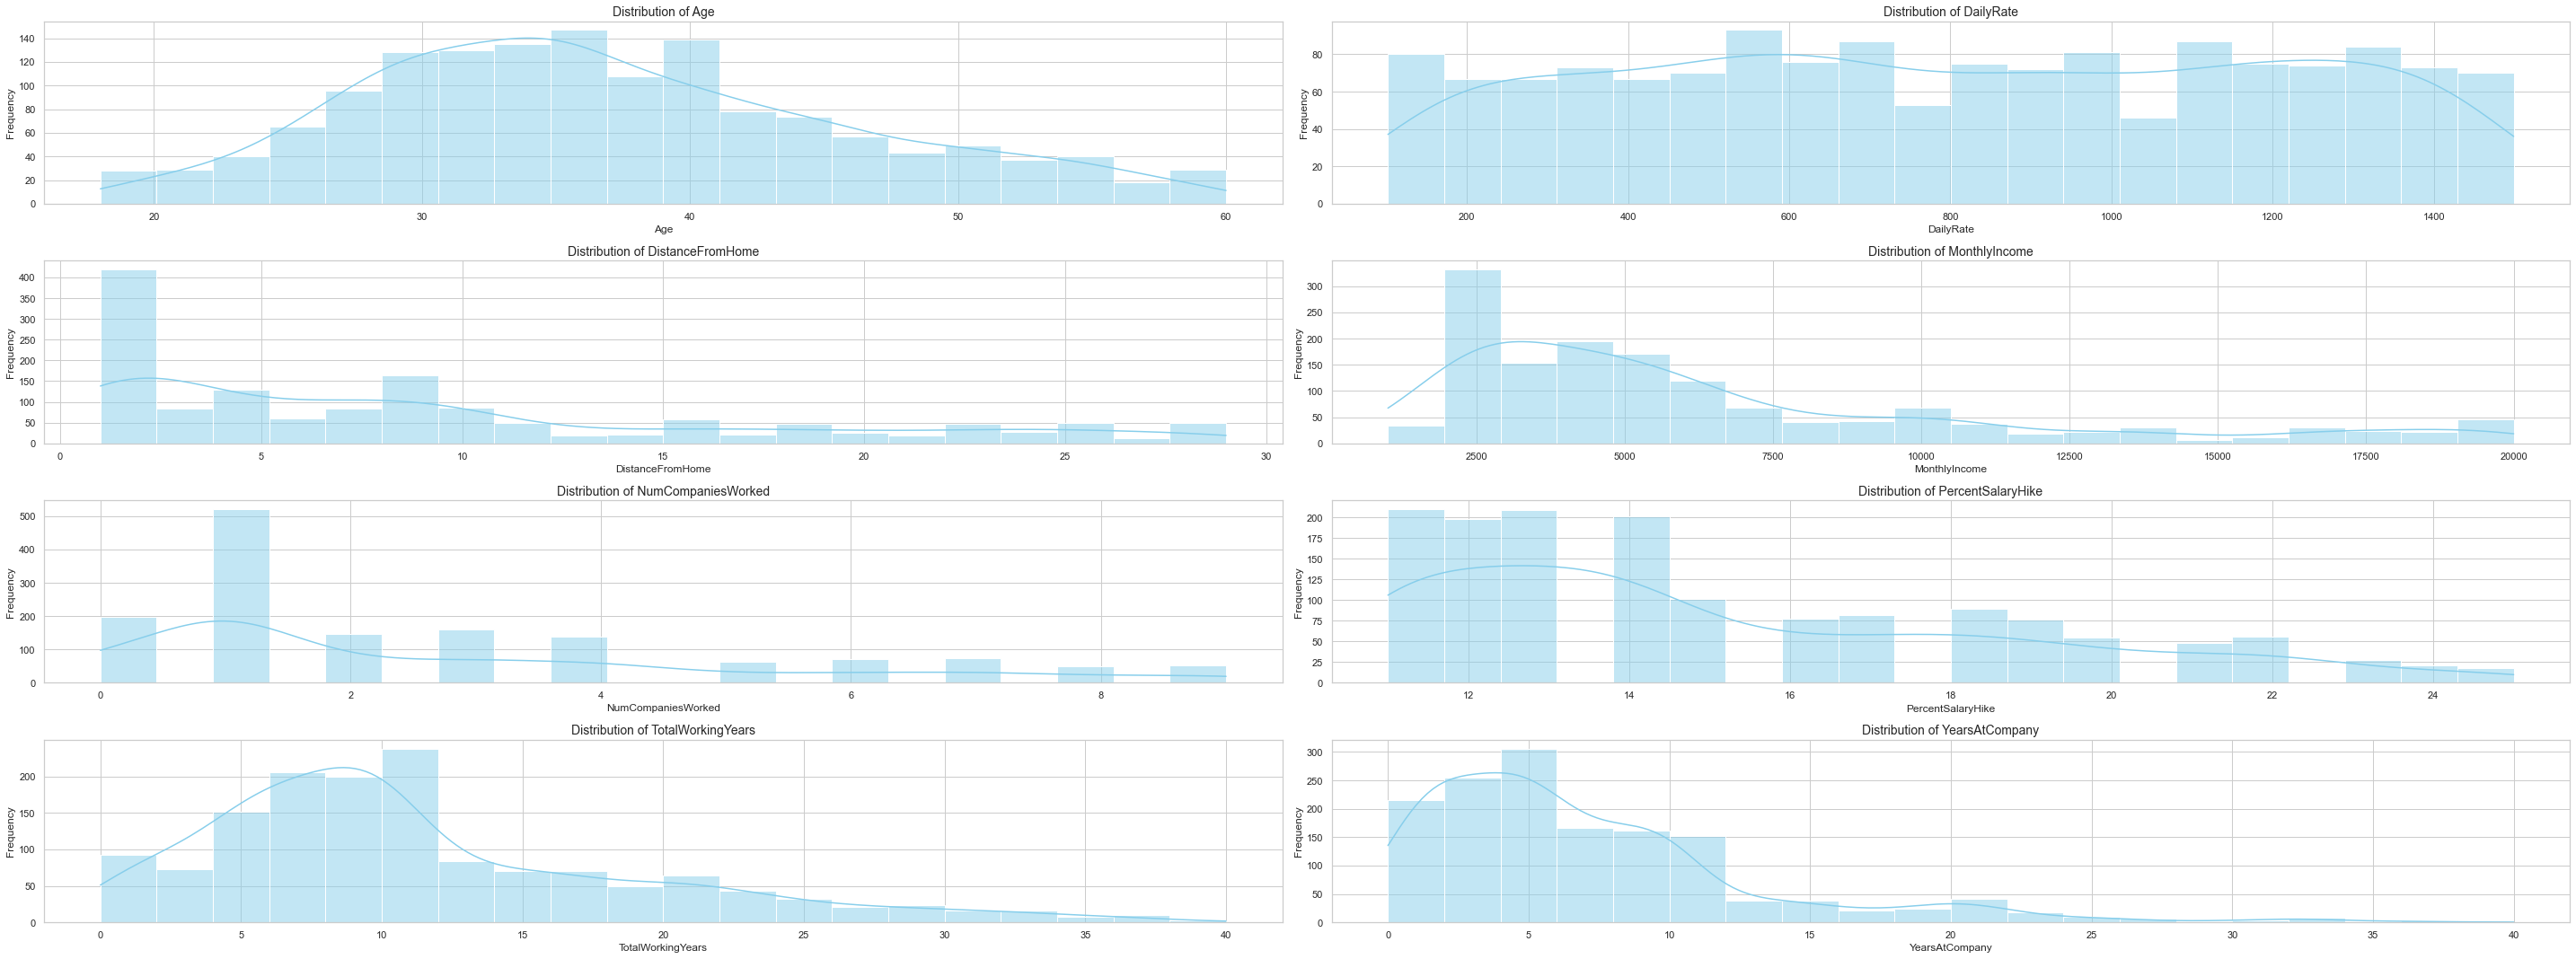

In [10]:
# Setting up the plot aesthetics
sns.set(style="whitegrid")

# Histograms for numerical features
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany']

# Create a larger figure
plt.figure(figsize=(40, 15))

# Loop to create subplots for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  # Adjust the layout
plt.savefig('numerical_histograms.png')
plt.show()


- Age: Shows a roughly normal distribution with a peak around 35-40 years.
- DailyRate: Uniformly distributed across its range.
- DistanceFromHome: Most employees live close to the workplace; the distribution is right-skewed.
- MonthlyIncome: Right-skewed distribution, indicating more employees earn on the lower end.
- NumCompaniesWorked: Skewed towards fewer companies worked for.
- PercentSalaryHike: Normally distributed around 15%.
- TotalWorkingYears: Right-skewed, with a peak in the early years of career.
- YearsAtCompany: Most employees have been at the company for fewer than 10 years.

### Counts for Categorical Features

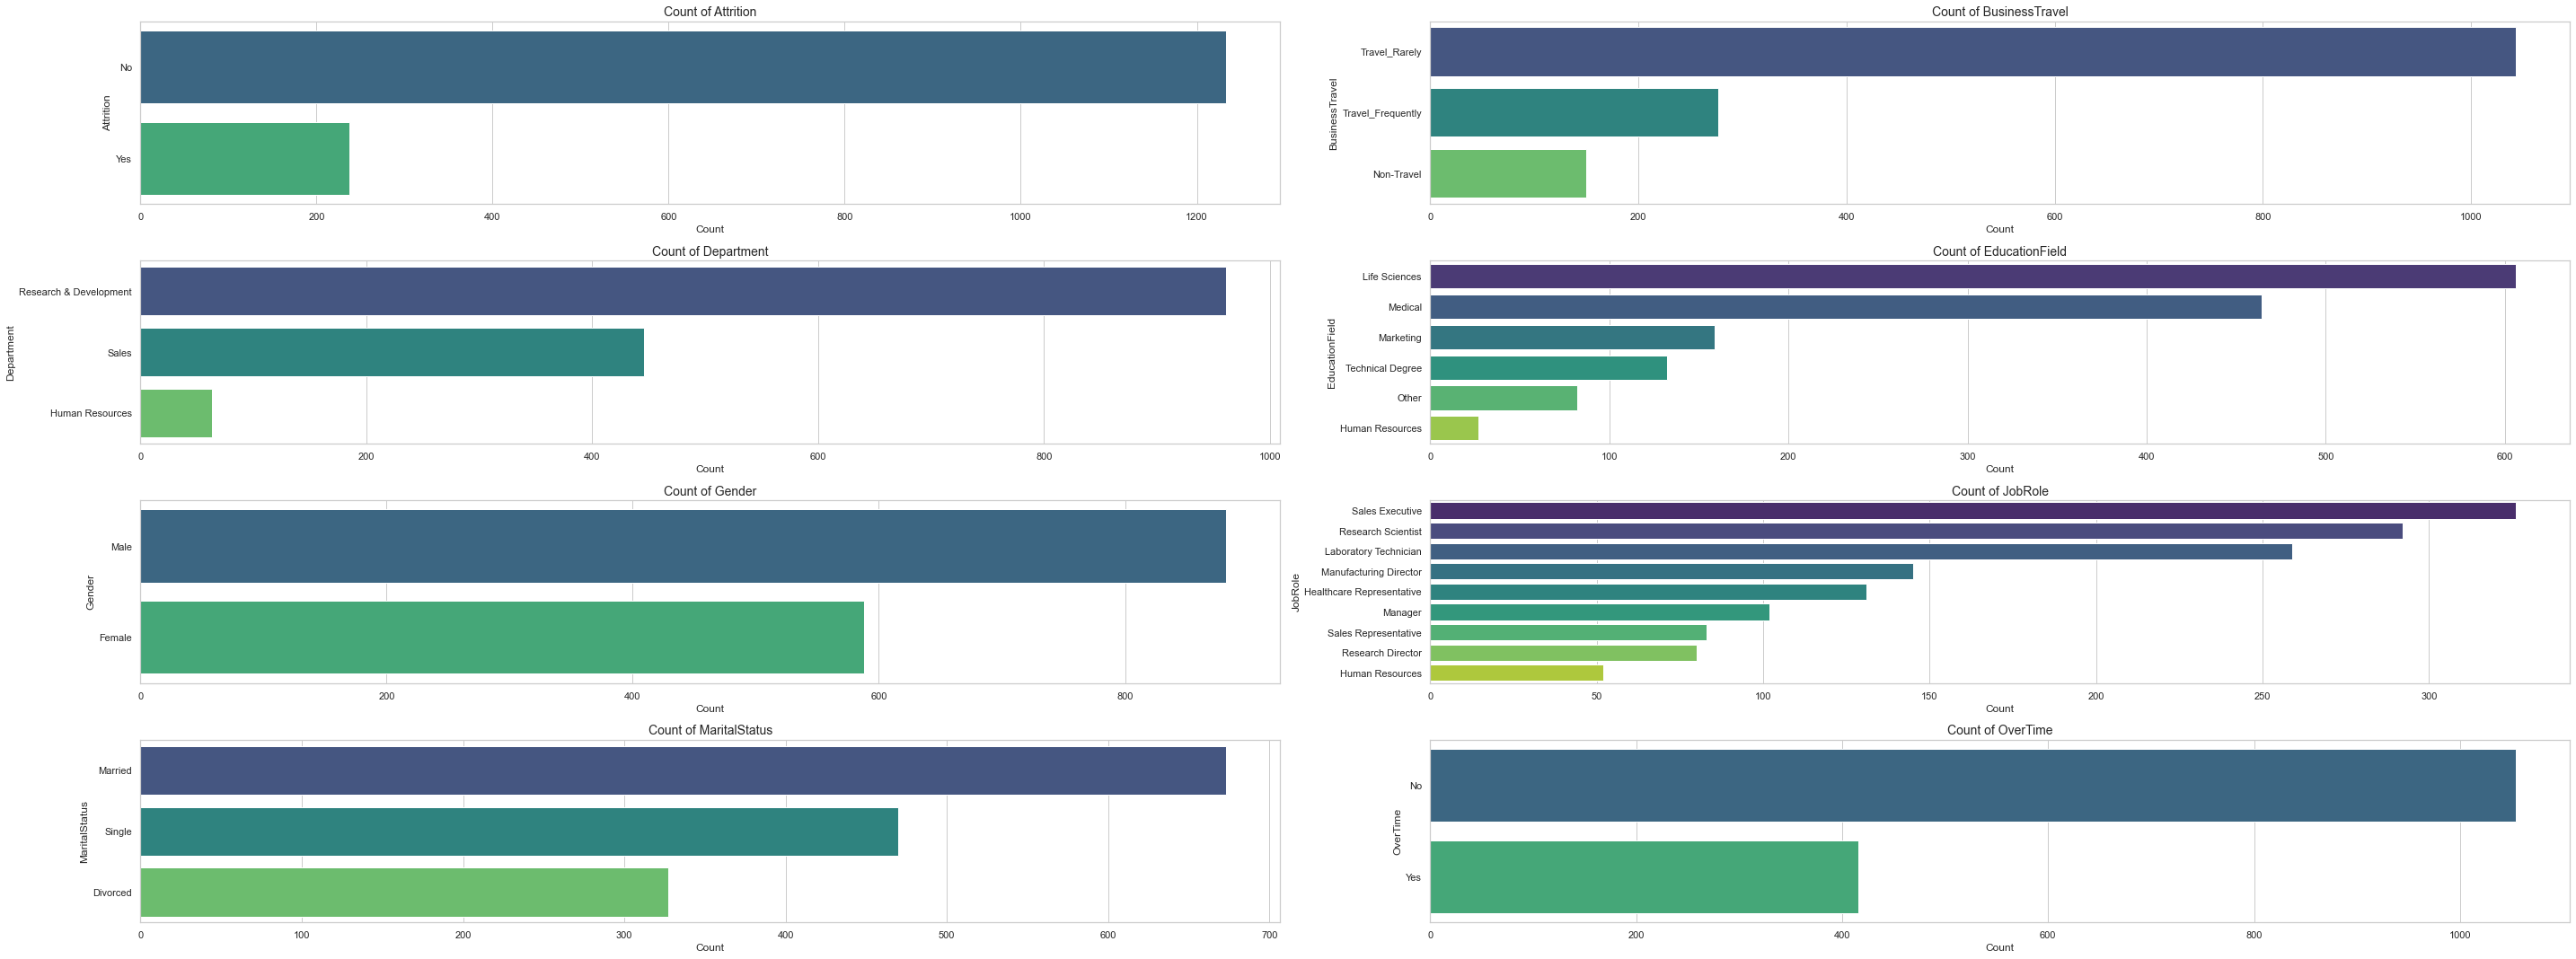

In [11]:
# Bar plots for categorical features
plt.figure(figsize=(40, 15))  # Increased figure size

categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Loop to create subplots for each categorical feature
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=data[feature], palette='viridis', order=data[feature].value_counts().index)
    plt.title(f'Count of {feature}', fontsize=14)  # Larger font size for title
    plt.xlabel('Count', fontsize=12)  # Larger font size for x-label
    plt.ylabel(feature, fontsize=12)  # Larger font size for y-label

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.savefig('categorical_barplots.png')
plt.show()

Attrition:
- Majority (84%) have not left the company (No).
- A smaller portion (16%) have left (Yes).

BusinessTravel:
- Most employees (71%) travel rarely.
- Some (19%) travel frequently or often.
  
Department:
- Most employees are in Research & Development (65%).
- Other departments: Sales (30%), Human Resources (5%).

EducationField:
-  Dominated by Life Sciences and Medical.

Gender:
- More males (60%) than females (40%).

JobRole:
- Varied, with Sales Executive and Research Scientist being common roles.

MaritalStatus:
- Majority are Married (46%), followed by Single (30%).

OverTime:

- Most employees do not work overtime (72%).

### Correlation Matrix

In [12]:
corr_matrix = data.corr()

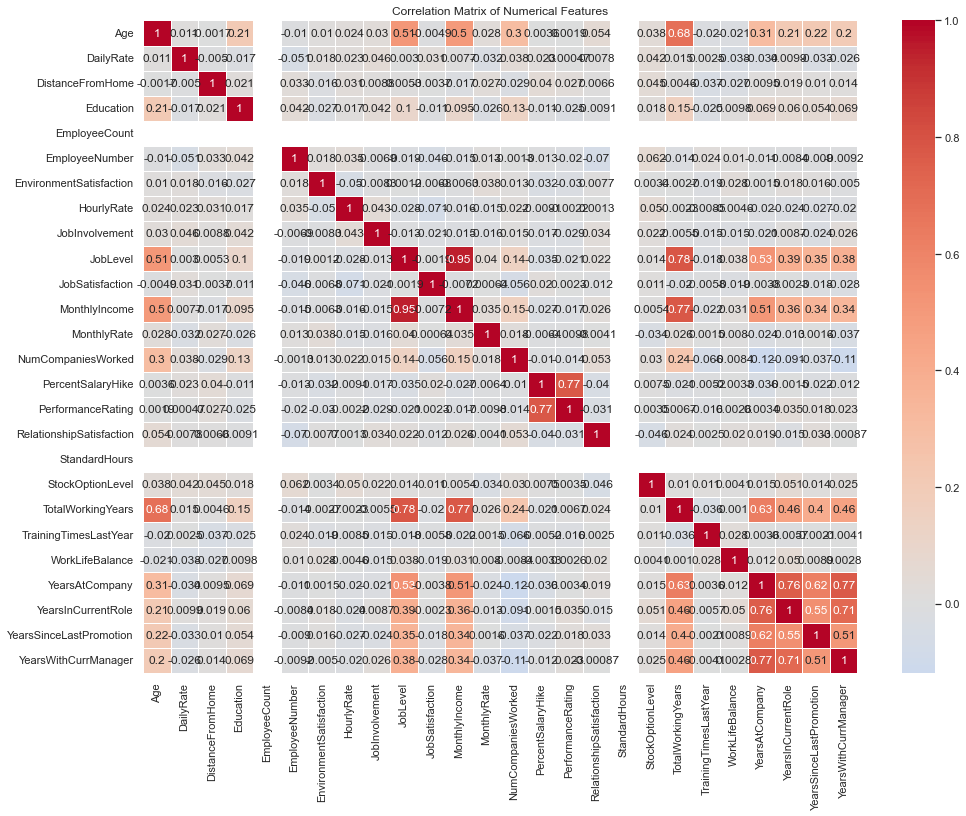

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Attrition Analysis

In [14]:
data.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


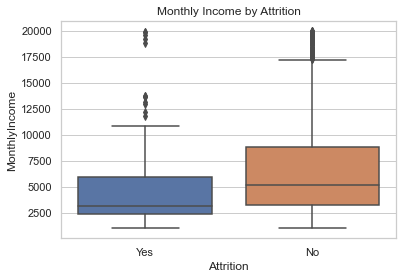

In [15]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Attrition')
plt.show()

The plot suggests that higher monthly income is associated with lower attrition rates. Employees with higher pay are more likely to stay with the company.

In [16]:
# Preprocess the data
data['Attrition'] = LabelEncoder().fit_transform(data['Attrition'])
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [17]:
# Split the data into features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Model Training with Hyperparameter Tuning
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [19]:
# Initialize and fit the model
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [20]:
# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [21]:
# Model Evaluation
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

In [22]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8877551020408163


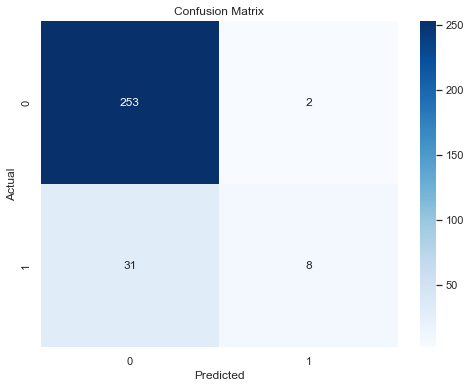

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.80      0.21      0.33        39

    accuracy                           0.89       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.88      0.89      0.86       294

